In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import moviepy.editor as mp
from python_speech_features import mfcc, logfbank
from tqdm import tqdm
import sklearn.mixture
from sklearn.decomposition import TruncatedSVD

infile = open('training_data.pkl', 'rb')
data = pickle.load(infile)
infile.close()
data = np.array(data)


n_features = 10
n_components = 4

In [2]:
# Normalize
print(data.shape)
def normalize(matrix):
    min_ = matrix.min(0)
    max_ = matrix.max(0)
    return np.divide((matrix - min_),max_)

n_data = normalize(data)

(187, 256)


### SVD dimensionality reduction

In [3]:
svd = TruncatedSVD(n_components=n_features, n_iter = 7)
X = svd.fit_transform(n_data)

In [4]:
print(X.shape)

(187, 10)


### GMM classification algorithm

In [5]:
model = sklearn.mixture.GaussianMixture(n_components)
Y = model.fit_predict(X)

(187,)


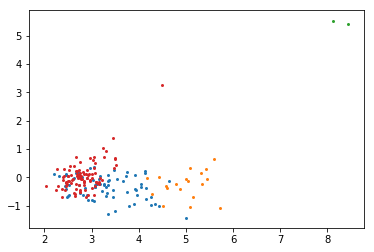

In [6]:
print(Y.shape)
for i in range(n_components):
    mask = np.where(Y==i)[0]
    X0_masked = (X[:,0][mask])
    X1_masked = (X[:,1][mask])
    plt.scatter(X0_masked,X1_masked, marker = '.', linewidth = 0.001)


In [7]:
import csv

def import_csv(filename):
    data = {}
    with open(filename, newline='\n') as csvfile:
        lines = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
        headers = lines[0]
        values = lines[1:]
        for c in headers[:-1]:
            data[c] = []

        for row in values:
            for i in range(len(headers)-1):
                data[headers[i]].append(float(row[i]))
    return data

def save_as_csv(dictionary, filename):
    with open(filename, 'w') as f:
        
        headers = list(dictionary.keys())
        
        for header in headers:
            f.write(header+',')
        f.write('\n')
        
        for i in range(len(dictionary[header])):
            for h in headers:
                f.write(str(dictionary[h][i])+',')
            f.write('\n')

In [8]:
data = import_csv('output.csv')
data['Label'] = Y
save_as_csv(data,'output.csv')
save_as_csv(data,'../../Website/output.csv')